In [6]:
#code that i took inspiration from https://github.com/SYSTEMSounds/sonification-tutorials


In [7]:
import pandas as pd 
filename = "/Users/daria/Desktop/GRAD_PROJECT/bucharest_scientific4"  #path for csv file
df = pd.read_csv(filename + ".csv")  #read csv file
print(df.head(21))  #show all 21 rows

                                          File Name  Highest Frequency  \
0            Recordings_bucharest_wavhome-ora16.wav         114.385190   
1          Recordings_bucharest_wavhome-ora16-3.wav         113.121057   
2   Recordings_bucharest_wavStrada Epurești 18.wav         106.648490   
3    Recordings_bucharest_wavStrada Epurești 9.wav          85.377321   
4    Recordings_bucharest_wavStrada Epurești 8.wav          55.029111   
5      Recordings_bucharest_wavStrada Epurești.wav         114.385190   
6    Recordings_bucharest_wavStrada Epurești 6.wav          80.668605   
7    Recordings_bucharest_wavStrada Epurești 7.wav          87.798351   
8    Recordings_bucharest_wavStrada Epurești 5.wav          61.541122   
9    Recordings_bucharest_wavStrada Epurești 4.wav          80.385016   
10          Recordings_bucharest_wavhome-ora162.wav          61.035156   
11   Recordings_bucharest_wavStrada Epurești 3.wav         113.121057   
12   Recordings_bucharest_wavStrada Epurești 2.

In [8]:
print(df.columns)

Index(['File Name', 'Highest Frequency', 'Lowest Frequency', 'Highest Decibel',
       'Lowest Decibel'],
      dtype='object')


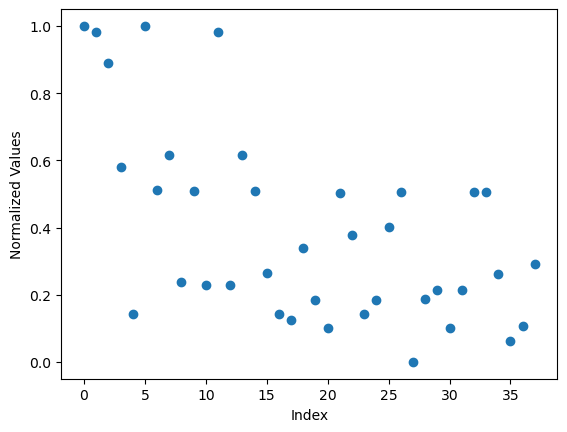

In [4]:
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
import numpy as np

#get the frequency values from the csv
highest_freq = df['Highest Frequency'].values.flatten() 
lowest_freq = df['Lowest Frequency'].values.flatten()

#combine both columns of freq values into 1
all_values = np.concatenate([highest_freq, lowest_freq])

#normalize data
normalized_values = (all_values - np.min(all_values)) / (np.max(all_values) - np.min(all_values))

#for i, val in enumerate(all_values):
   # print(f"Original: {val}, Normalized: {normalized_values[i]}")

#create the plot
plt.scatter(range(len(all_values)), normalized_values)
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.show()


In [9]:
frequency_values = df[['Highest Frequency', 'Lowest Frequency']].values.flatten()
decibel_values = df[['Highest Decibel', 'Lowest Decibel']].values.flatten()

In [10]:
def map_value(value, min_value, max_value, min_result, max_result):
    result = min_result + (value - min_value) / (max_value - min_value) * (max_result - min_result)
    return result


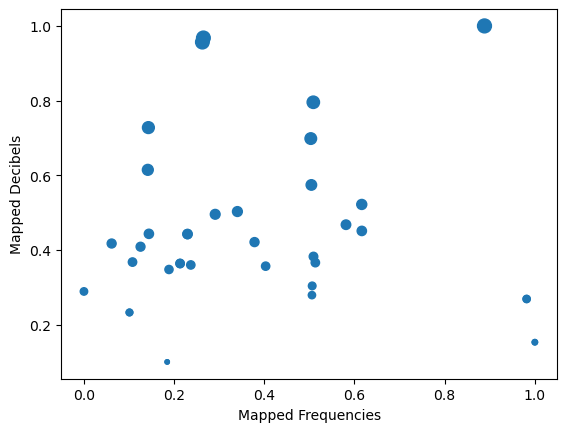

In [11]:
#visualise the relationship between the frequencies and the decibels
#the bigger the circle the louder the note

mapped_frequencies = map_value(frequency_values, min(frequency_values), max(frequency_values), 0, 1)
mapped_decibels = map_value(decibel_values, min(decibel_values), max(decibel_values), 0.1, 1)

plt.scatter(mapped_frequencies, mapped_decibels, s=100 * mapped_decibels)
plt.xlabel('Mapped Frequencies')
plt.ylabel('Mapped Decibels')
plt.show()


In [13]:
duration_beats = 40

#to calculate the interval between each note
time_interval = duration_beats / len(all_values)

#generate the t_data based on position and time interval
t_data = [i * time_interval for i in range(len(all_values))]



In [14]:
bpm = 90  #beats per minute
duration_sec = duration_beats*90/bpm #duration in seconds 
print('Duration:', duration_sec, 'seconds')



Duration: 40.0 seconds


In [10]:
#from audiolazy import str2midi, midi2str #test to see if it works
#print(midi2str(63))

In [18]:
#d melodic minor scale notes

note_names = ['D0', 'E0', 'F0', 'G0', 'A0', 'B0', 'C#1', 
              'D1', 'E1', 'F1', 'G1', 'A1', 'B1', 'C#2', 
              'D2', 'E2', 'F2', 'G2', 'A2', 'B2', 'C#3', 'D3']

note_frequencies = [36.71, 41.20, 43.65, 49.00, 55.00, 61.74, 69.30, 73.42, 
                    82.41, 87.31, 98.00, 110.00, 123.47, 138.59, 146.83, 164.81,
                    174.61, 196.00, 220.00, 246.94, 277.18, 293.66]



In [54]:
#note_midis = [str2midi(n) for n in note_names] 
#n_notes = len(note_midis)

In [19]:
import numpy as np
from scipy.spatial import distance #to calculate the closest distance 

mapped_notes = []
distances = []

#maps the frequency values to the note that has the closest value
for freq in all_values:
    closest_note_index = min(range(len(note_frequencies)), key=lambda i: abs(note_frequencies[i] - freq))
    closest_note = note_names[closest_note_index]
    mapped_notes.append(closest_note)
    distance_value = abs(note_frequencies[closest_note_index] - freq)
    distances.append(distance_value)

    print(f"Frequency {freq} mapped to note {closest_note}, distance: {distance_value:.2f}")


Frequency 114.385190217391 mapped to note A1, distance: 4.39
Frequency 113.121056782334 mapped to note A1, distance: 3.12
Frequency 106.648489932886 mapped to note A1, distance: 3.35
Frequency 85.3773212169103 mapped to note F1, distance: 1.93
Frequency 55.02911121673 mapped to note A0, distance: 0.03
Frequency 114.385190217391 mapped to note A1, distance: 4.39
Frequency 80.6686046511628 mapped to note E1, distance: 1.74
Frequency 87.7983513779528 mapped to note F1, distance: 0.49
Frequency 61.5411217303823 mapped to note B0, distance: 0.20
Frequency 80.3850156087409 mapped to note E1, distance: 2.02
Frequency 61.03515625 mapped to note B0, distance: 0.70
Frequency 113.121056782334 mapped to note A1, distance: 3.12
Frequency 61.03515625 mapped to note B0, distance: 0.70
Frequency 87.8063725490196 mapped to note F1, distance: 0.50
Frequency 80.3571428571429 mapped to note E1, distance: 2.05
Frequency 63.4776536312849 mapped to note B0, distance: 1.74
Frequency 55.1055602006689 mapped to

In [20]:
def note_to_midi(note):
    #map the note names to the midi notes
    note_mapping = {
        'C': 0, 'C#': 1, 'Db': 1, 'D': 2, 'D#': 3, 'Eb': 3, 'E': 4, 'F': 5,
        'F#': 6, 'Gb': 6, 'G': 7, 'G#': 8, 'Ab': 8, 'A': 9, 'A#': 10, 'Bb': 10, 'B': 11
    }

    note_name = note[:-1]
    octave = int(note[-1])

    #calculates the midi note nr
    midi_note = note_mapping[note_name] + (octave + 1) * 12

    return midi_note



In [21]:
mapped_midi_notes = [note_to_midi(note) for note in mapped_notes]

print(mapped_midi_notes) #midi notes that will be in the melody

[33, 33, 33, 29, 21, 33, 28, 29, 23, 28, 23, 33, 23, 29, 28, 23, 21, 21, 25, 21, 21, 28, 25, 21, 21, 26, 28, 17, 21, 23, 21, 23, 28, 28, 23, 19, 21, 23]


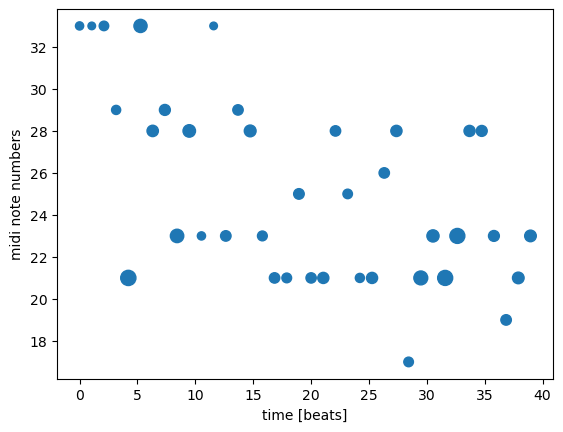

In [22]:
import math

vel_min = 30   #min note velocity
vel_max = 120  #max note velocity
min_decibel = min(decibel_values)  # min db value from y_data
max_decibel = max(decibel_values)  # max db value from y_data

vel_data = []
for i in range(len(decibel_values)):
    decibel = decibel_values[i]
    
    #maps the velocity to the db values
    velocity = round(map_value(decibel, min_decibel, max_decibel, vel_min, vel_max))
    
    #add the velocity to the vel_data list
    vel_data.append(velocity)

plt.scatter(t_data, mapped_midi_notes, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [41]:
#vel_min,vel_max = 40,130   #minimum and maximum note velocity
#vel_data = []
#for i in range(len(y_data)):
#    note_velocity = round(map_value(y_data[i],0,1,vel_min, vel_max)) 
#    vel_data.append(note_velocity)
    
#plt.scatter(t_data, midi_data, s=vel_data)
#plt.xlabel('time [beats]')
#plt.ylabel('midi note numbers')
#plt.show()

In [23]:
print(mapped_midi_notes)

[33, 33, 33, 29, 21, 33, 28, 29, 23, 28, 23, 33, 23, 29, 28, 23, 21, 21, 25, 21, 21, 28, 25, 21, 21, 26, 28, 17, 21, 23, 21, 23, 28, 28, 23, 19, 21, 23]


In [24]:
raised_midi_notes = [midi_note + 24 for midi_note in mapped_midi_notes]
print(raised_midi_notes)

[57, 57, 57, 53, 45, 57, 52, 53, 47, 52, 47, 57, 47, 53, 52, 47, 45, 45, 49, 45, 45, 52, 49, 45, 45, 50, 52, 41, 45, 47, 45, 47, 52, 52, 47, 43, 45, 47]


In [25]:
from midiutil import MIDIFile 

filename = '/Users/daria/Desktop/GRAD_PROJECT/freq_midi_bucharest_testsave'
    
#create midi file
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 

#add midi notes
for i in range(len(t_data)):
    my_midi_file.addNote(track=0, channel=0, time=t_data[i], pitch=raised_midi_notes[i], volume=vel_data[i], duration=2)
#create and save the midi file
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)

In [26]:
import os
print(os.getcwd())


/Users/daria
